In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

In [2]:
env = UnityEnvironment(file_name="C:/Users/u224870/Projekte/Udacity/Deep-Reinforcement-Learning/Navigation/env/Banana.exe", no_graphics=False);

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
from agent.DQN_Agent import Agent
from collections import deque
import matplotlib.pyplot as plt
from IPython import display

cpu


In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

In [6]:
lr = 0.5e-3
episodes = 200

In [7]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [8]:
def RunAgent(agent,n_episodes,fName):
    limited_actions = [0,1,2,3]
    max_score = 0.
    mean_score = []
    plot_success =[]
    plot_score = []
    solved = False
    solved_after = n_episodes+1
    agent.qnetwork_local.load_state_dict(torch.load('./Nets/best_network'+fName+'.pth'))
    for i in range(1,n_episodes+1):
        score = 0 # initialize the score
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        while True:
            action = agent.act(state, 0.001)        # select an action
            env_info = env.step(limited_actions[action])[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        # Get a feeling of how many episode terminate above a score of 13.
        mean_score.append(score)
        plot_score.append(score)
        print('Episode {}\tAverage Score: {:.2f}'.format(i, np.mean(mean_score)), end="")
        #plt.plot(plot_success)
        plt.plot(plot_score)
        plt.xlabel("Episode")
        plt.ylabel("Average Score")
        plt.show()

        display.clear_output(wait=True)
    return plot_score, solved_after

Episode 200	Average Score: 15.38

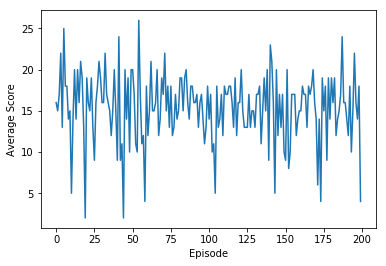

In [9]:
DQN = Agent(state_size=state_size, action_size=action_size, learning_rate = lr, double_dqn=False,dueling=False,seed=0)
score_DQN,sol_DQN = RunAgent(DQN,episodes,'DQN')

Episode 200	Average Score: 15.28

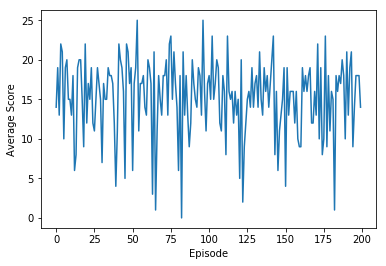

In [10]:
doubleDQN = Agent(state_size=state_size, action_size=action_size, learning_rate = lr,double_dqn=True,dueling=False,seed=0)
score_doubleDQN,sol_doubleDQN = RunAgent(doubleDQN,episodes,'doubleDQN')

Episode 200	Average Score: 15.65

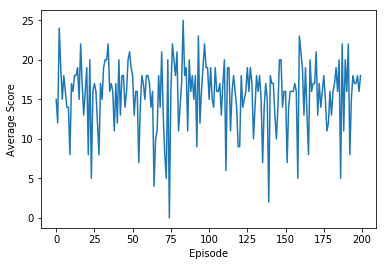

In [11]:
DDQN = Agent(state_size=state_size, action_size=action_size, learning_rate = lr,double_dqn=False,dueling=True,seed=0)
score_DDQN,sol_DDQN = RunAgent(DDQN,episodes,'DDQN')

Episode 200	Average Score: 14.27

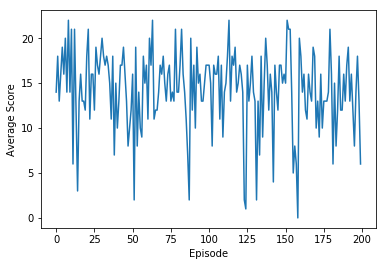

In [12]:
doubleDDQN = Agent(state_size=state_size, action_size=action_size, learning_rate = lr,double_dqn=True,dueling=True,seed=0)
score_doubleDDQN,sol_doubleDDQN = RunAgent(doubleDDQN,episodes,'doubleDDQN')

In [13]:
env.close()